In [32]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats 
from sklearn import metrics 
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression    
from sklearn.ensemble import RandomForestRegressor


In [33]:
os.chdir('C:\\Users\\yashi')

In [34]:
df = pd.read_csv('covid19_sample.csv')

In [35]:
df.head()

,Unnamed: 0,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,3517780,2020/07/22,NaN,NaN,Laboratory-confirmed case,Female,70 - 79 Years,"White, Non-Hispanic",Yes,Missing,Yes,Missing
1,3679793,2020/08/07,2020/08/04,NaN,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Yes,Unknown,Yes,Missing
2,3331587,2020/03/31,NaN,NaN,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Yes,No,Yes,Yes
3,3680266,2020/08/11,2020/08/05,NaN,Laboratory-confirmed case,Female,80+ Years,"Black, Non-Hispanic",Yes,Unknown,Yes,Yes
4,6264234,2020/04/18,NaN,NaN,Probable Case,Female,50 - 59 Years,"Asian, Non-Hispanic",Unknown,Unknown,Yes,Unknown


In [36]:
df.shape

(184155, 12)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184155 entries, 0 to 184154
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Unnamed: 0                     184155 non-null  int64 
 1   cdc_report_dt                  184155 non-null  object
 2   pos_spec_dt                    67144 non-null   object
 3   onset_dt                       118445 non-null  object
 4   current_status                 184155 non-null  object
 5   sex                            184154 non-null  object
 6   age_group                      184151 non-null  object
 7   Race and ethnicity (combined)  184154 non-null  object
 8   hosp_yn                        184155 non-null  object
 9   icu_yn                         184155 non-null  object
 10  death_yn                       184155 non-null  object
 11  medcond_yn                     184155 non-null  object
dtypes: int64(1), object(11)
memory usage: 16.9+ 

In [38]:
df.dtypes[df.dtypes=='object'].index

Index(['cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'current_status', 'sex',
       'age_group', 'Race and ethnicity (combined)', 'hosp_yn', 'icu_yn',
       'death_yn', 'medcond_yn'],
      dtype='object')

In [39]:
df.dtypes[df.dtypes!='object'].index

Index(['Unnamed: 0'], dtype='object')

In [40]:
df.drop(columns=['Unnamed: 0'], inplace = True)

In [41]:
df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/07/22,NaN,NaN,Laboratory-confirmed case,Female,70 - 79 Years,"White, Non-Hispanic",Yes,Missing,Yes,Missing
1,2020/08/07,2020/08/04,NaN,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Yes,Unknown,Yes,Missing
2,2020/03/31,NaN,NaN,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Yes,No,Yes,Yes
3,2020/08/11,2020/08/05,NaN,Laboratory-confirmed case,Female,80+ Years,"Black, Non-Hispanic",Yes,Unknown,Yes,Yes
4,2020/04/18,NaN,NaN,Probable Case,Female,50 - 59 Years,"Asian, Non-Hispanic",Unknown,Unknown,Yes,Unknown


In [42]:
df.rename(columns = {"Race and ethnicity (combined)" : "Race_ethnicity"}, inplace = True)

In [43]:
df1 = pd.get_dummies(data=df, columns = ["Race_ethnicity"], drop_first=True)

In [44]:
df1.columns = df1.columns.str.replace(" ", "_")
df1.columns = df1.columns.str.replace("-", "_")
df1.columns = df1.columns.str.replace(",", "_")
df1.columns = df1.columns.str.replace("/", "_")

In [45]:
df1.columns

Index(['cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'current_status', 'sex',
       'age_group', 'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn',
       'Race_ethnicity_Asian__Non_Hispanic',
       'Race_ethnicity_Black__Non_Hispanic', 'Race_ethnicity_Hispanic_Latino',
       'Race_ethnicity_Missing', 'Race_ethnicity_Multiple_Other__Non_Hispanic',
       'Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic',
       'Race_ethnicity_Unknown', 'Race_ethnicity_White__Non_Hispanic'],
      dtype='object')

In [46]:
df1['age_group'] = df1['age_group'].map({'0 - 9 Years': '0 - 19 years',
                                      '10 - 19 Years': '0 - 19 years',
                                      '20 - 29 Years': '20 - 39 years',
                                      '30 - 39 Years': '20 - 39 years',
                                      '40 - 49 Years': '40 - 59 years',
                                      '50 - 59 Years': '40 - 59 years',
                                      '60 - 69 Years': '60+ Years',
                                      '70 - 79 Years': '60+ Years',
                                      '80+ Years': '60+ Years',
                                      'Unknown': 'Unknown'})

In [47]:
df1.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race_ethnicity_Asian__Non_Hispanic,Race_ethnicity_Black__Non_Hispanic,Race_ethnicity_Hispanic_Latino,Race_ethnicity_Missing,Race_ethnicity_Multiple_Other__Non_Hispanic,Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic,Race_ethnicity_Unknown,Race_ethnicity_White__Non_Hispanic
0,2020/07/22,NaN,NaN,Laboratory-confirmed case,Female,60+ Years,Yes,Missing,Yes,Missing,0,0,0,0,0,0,0,1
1,2020/08/07,2020/08/04,NaN,Laboratory-confirmed case,Female,60+ Years,Yes,Unknown,Yes,Missing,0,0,0,0,0,0,0,1
2,2020/03/31,NaN,NaN,Laboratory-confirmed case,Male,60+ Years,Yes,No,Yes,Yes,0,0,0,0,0,0,0,1
3,2020/08/11,2020/08/05,NaN,Laboratory-confirmed case,Female,60+ Years,Yes,Unknown,Yes,Yes,0,1,0,0,0,0,0,0
4,2020/04/18,NaN,NaN,Probable Case,Female,40 - 59 years,Unknown,Unknown,Yes,Unknown,1,0,0,0,0,0,0,0


In [48]:
b=pd.DataFrame(df.isnull().sum()/184155).reset_index()
b.columns=["Variable", "percentage"]
b["percentage"]=b["percentage"]*100
b

,Variable,percentage
0,cdc_report_dt,0.000000
1,pos_spec_dt,63.539410
2,onset_dt,35.681898
3,current_status,0.000000
4,sex,0.000543
5,age_group,0.002172
6,Race_ethnicity,0.000543
7,hosp_yn,0.000000
8,icu_yn,0.000000
9,death_yn,0.000000


As per the result we can drop pos_spec_dt column as in this 63% of the data is missing

In [49]:
df1.isnull().sum()

cdc_report_dt                                                               0
pos_spec_dt                                                            117011
onset_dt                                                                65710
current_status                                                              0
sex                                                                         1
age_group                                                                   4
hosp_yn                                                                     0
icu_yn                                                                      0
death_yn                                                                    0
medcond_yn                                                                  0
Race_ethnicity_Asian__Non_Hispanic                                          0
Race_ethnicity_Black__Non_Hispanic                                          0
Race_ethnicity_Hispanic_Latino                                  

In [50]:
df1['age_group'] = df1['age_group'].fillna('Unknown')

In [51]:
df1['sex'] = df1['sex'].fillna('Unknown')

In [52]:
df1.isnull().sum()

cdc_report_dt                                                               0
pos_spec_dt                                                            117011
onset_dt                                                                65710
current_status                                                              0
sex                                                                         0
age_group                                                                   0
hosp_yn                                                                     0
icu_yn                                                                      0
death_yn                                                                    0
medcond_yn                                                                  0
Race_ethnicity_Asian__Non_Hispanic                                          0
Race_ethnicity_Black__Non_Hispanic                                          0
Race_ethnicity_Hispanic_Latino                                  

### UNIVARIATE ANALYSIS

In [53]:
def univariate_cat(data,x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    
    f1=pd.DataFrame(data[x].value_counts(dropna=False))
    f1.rename(columns={x:"Count"},inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:"Percentage"},inplace=True)
    f2["Percentage"]=(f2["Percentage"]*100).round(2).astype(str)+" %"
    ff=pd.concat([f1,f2],axis=1)
    
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique category : {unique_cnt}\n")
    print(f"Unique categories : \n{unique_cat}")
    print(f"Value count and %\n: {ff}")
    
    sns.countplot(data=data,x=x)
    plt.show()

Total missing values : 0

Total count of unique category : 2

Unique categories : 
['Yes', 'No']
Value count and %
:       Count Percentage
No   110724    60.13 %
Yes   73431    39.87 %


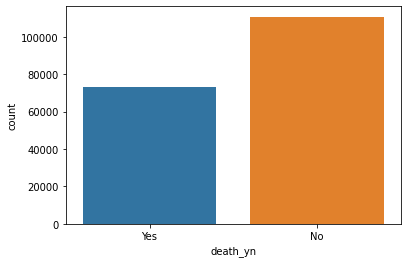

In [54]:
univariate_cat(data=df1,x='death_yn')

Total missing values : 0

Total count of unique category : 4

Unique categories : 
['Yes', 'Unknown', 'Missing', 'No']
Value count and %
:          Count Percentage
No       91217    49.53 %
Yes      53384    28.99 %
Unknown  20043    10.88 %
Missing  19511    10.59 %


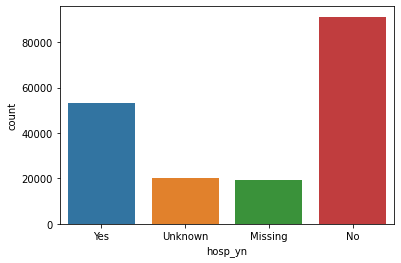

In [55]:
univariate_cat(data=df1,x='hosp_yn')

Total missing values : 0

Total count of unique category : 4

Unique categories : 
['Missing', 'Unknown', 'No', 'Yes']
Value count and %
:           Count Percentage
Missing  103731    56.33 %
Unknown   42300    22.97 %
No        27584    14.98 %
Yes       10540     5.72 %


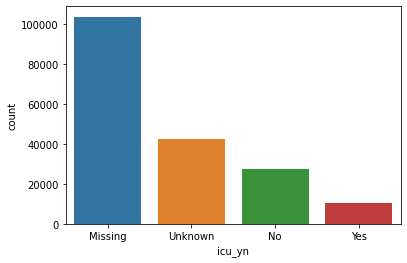

In [56]:
univariate_cat(data=df1,x='icu_yn')

Total missing values : 0

Total count of unique category : 4

Unique categories : 
['Missing', 'Yes', 'Unknown', 'No']
Value count and %
:           Count Percentage
Missing  101496    55.11 %
Yes       42408    23.03 %
Unknown   21830    11.85 %
No        18421     10.0 %


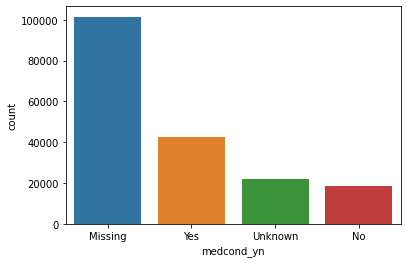

In [57]:
univariate_cat(data=df1,x='medcond_yn')

Total missing values : 0

Total count of unique category : 2

Unique categories : 
['Laboratory-confirmed case', 'Probable Case']
Value count and %
:                             Count Percentage
Laboratory-confirmed case  173359    94.14 %
Probable Case               10796     5.86 %


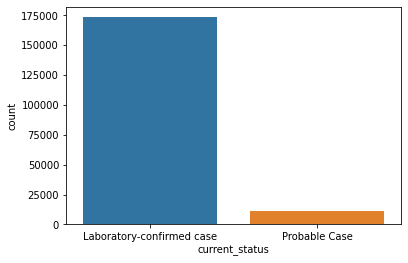

In [58]:
univariate_cat(data=df1,x='current_status')

### converting cdc_report_dt column to datetime format to extract day, year, month, week_of_day etc.

In [59]:
df1['cdc_report_dt']= pd.to_datetime(df1['cdc_report_dt'])

In [60]:
df1["month"]=df1["cdc_report_dt"].dt.month
df1["year"]=df1["cdc_report_dt"].dt.year
df1["week_of_day"]=df1["cdc_report_dt"].dt.dayofweek
df1["day"]=df1["cdc_report_dt"].dt.day
df1["hours"]=df1["cdc_report_dt"].dt.hour
df1["minute"]=df1["cdc_report_dt"].dt.minute
df1["Quarter"]=df1["cdc_report_dt"].dt.quarter

In [61]:
df1['week_of_day'].value_counts()

2    37372
1    29241
0    27831
3    24210
6    22150
4    21904
5    21447
Name: week_of_day, dtype: int64

In [62]:
df1["isweekend"]=np.where(df1["week_of_day"].isin([5,6]),1,0)   #combined 5,6 as one category i.e weekend

In [63]:
df1['isweekend'].value_counts()

0    140558
1     43597
Name: isweekend, dtype: int64

In [64]:
def day_cat(x):
    if x<=10:
        return "starting_of_month"
    elif x>10 and x<=20:
        return "mid_of_month"
    else:
        return "End_of_month"
df1["day_cat"]=df1["day"].apply(lambda a : day_cat(a))

In [65]:
df1["day_cat"].value_counts()

mid_of_month         62961
starting_of_month    61577
End_of_month         59617
Name: day_cat, dtype: int64

In [66]:
df1['Quarter'].value_counts()

2    67216
3    61716
4    49737
1     5486
Name: Quarter, dtype: int64

In [67]:
def death(x):
    if x=='Yes':
        return "1"
    elif x=='No':
        return "0"
    else:
        return "others"
df1["death"]=df1["death_yn"].apply(lambda a : death(a))

In [68]:
df1['death'].value_counts()

0    110724
1     73431
Name: death, dtype: int64

### DROPING COLUMNS

In [69]:
df1.drop(columns=['pos_spec_dt', 'onset_dt'], inplace = True)

In [70]:
df1.drop(columns=['death_yn'], inplace = True)

In [71]:
df1.drop(columns=['cdc_report_dt'], inplace = True)

### COMBINING COLUMNS

In [72]:
df1['icu_yn']=df1['icu_yn'].replace(['Unkown','Missing'],'Unknown')
df1['hosp_yn']=df1['hosp_yn'].replace(['Unkown','Missing'],'Unknown')
df1['medcond_yn']=df1['medcond_yn'].replace(['Unkown','Missing'],'Unknown')

In [73]:
df1.head()

,current_status,sex,age_group,hosp_yn,icu_yn,medcond_yn,Race_ethnicity_Asian__Non_Hispanic,Race_ethnicity_Black__Non_Hispanic,Race_ethnicity_Hispanic_Latino,Race_ethnicity_Missing,...,month,year,week_of_day,day,hours,minute,Quarter,isweekend,day_cat,death
0,Laboratory-confirmed case,Female,60+ Years,Yes,Unknown,Unknown,0,0,0,0,...,7,2020,2,22,0,0,3,0,End_of_month,1
1,Laboratory-confirmed case,Female,60+ Years,Yes,Unknown,Unknown,0,0,0,0,...,8,2020,4,7,0,0,3,0,starting_of_month,1
2,Laboratory-confirmed case,Male,60+ Years,Yes,No,Yes,0,0,0,0,...,3,2020,1,31,0,0,1,0,End_of_month,1
3,Laboratory-confirmed case,Female,60+ Years,Yes,Unknown,Yes,0,1,0,0,...,8,2020,1,11,0,0,3,0,mid_of_month,1
4,Probable Case,Female,40 - 59 years,Unknown,Unknown,Unknown,1,0,0,0,...,4,2020,5,18,0,0,2,1,mid_of_month,1


In [74]:
df1.dtypes

current_status                                                         object
sex                                                                    object
age_group                                                              object
hosp_yn                                                                object
icu_yn                                                                 object
medcond_yn                                                             object
Race_ethnicity_Asian__Non_Hispanic                                      uint8
Race_ethnicity_Black__Non_Hispanic                                      uint8
Race_ethnicity_Hispanic_Latino                                          uint8
Race_ethnicity_Missing                                                  uint8
Race_ethnicity_Multiple_Other__Non_Hispanic                             uint8
Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic     uint8
Race_ethnicity_Unknown                                          

In [75]:
obj_var=df1.dtypes[df1.dtypes=='object'].index
num_var=df1.dtypes[df1.dtypes!='object'].index

In [76]:
df1_num = df1[num_var]
df1_obj = df1[obj_var]

In [77]:
df_final=pd.concat([df1_num, df1_obj], axis=1)

In [78]:
df_final

,Race_ethnicity_Asian__Non_Hispanic,Race_ethnicity_Black__Non_Hispanic,Race_ethnicity_Hispanic_Latino,Race_ethnicity_Missing,Race_ethnicity_Multiple_Other__Non_Hispanic,Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic,Race_ethnicity_Unknown,Race_ethnicity_White__Non_Hispanic,month,year,...,Quarter,isweekend,current_status,sex,age_group,hosp_yn,icu_yn,medcond_yn,day_cat,death
0,0,0,0,0,0,0,0,1,7,2020,...,3,0,Laboratory-confirmed case,Female,60+ Years,Yes,Unknown,Unknown,End_of_month,1
1,0,0,0,0,0,0,0,1,8,2020,...,3,0,Laboratory-confirmed case,Female,60+ Years,Yes,Unknown,Unknown,starting_of_month,1
2,0,0,0,0,0,0,0,1,3,2020,...,1,0,Laboratory-confirmed case,Male,60+ Years,Yes,No,Yes,End_of_month,1
3,0,1,0,0,0,0,0,0,8,2020,...,3,0,Laboratory-confirmed case,Female,60+ Years,Yes,Unknown,Yes,mid_of_month,1
4,1,0,0,0,0,0,0,0,4,2020,...,2,1,Probable Case,Female,40 - 59 years,Unknown,Unknown,Unknown,mid_of_month,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184150,0,0,0,0,0,0,0,1,9,2020,...,3,0,Laboratory-confirmed case,Male,0 - 19 years,No,Unknown,Unknown,starting_of_month,0
184151,0,0,1,0,0,0,0,0,6,2020,...,2,0,Laboratory-confirmed case,Male,60+ Years,No,Unknown,Unknown,End_of_month,0
184152,1,0,0,0,0,0,0,0,8,2020,...,3,0,Laboratory-confirmed case,Male,40 - 59 years,No,Unknown,Unknown,starting_of_month,0
184153,0,0,0,0,0,0,1,0,5,2020,...,2,0,Laboratory-confirmed case,Male,60+ Years,Unknown,Unknown,Unknown,End_of_month,0


<AxesSubplot:>

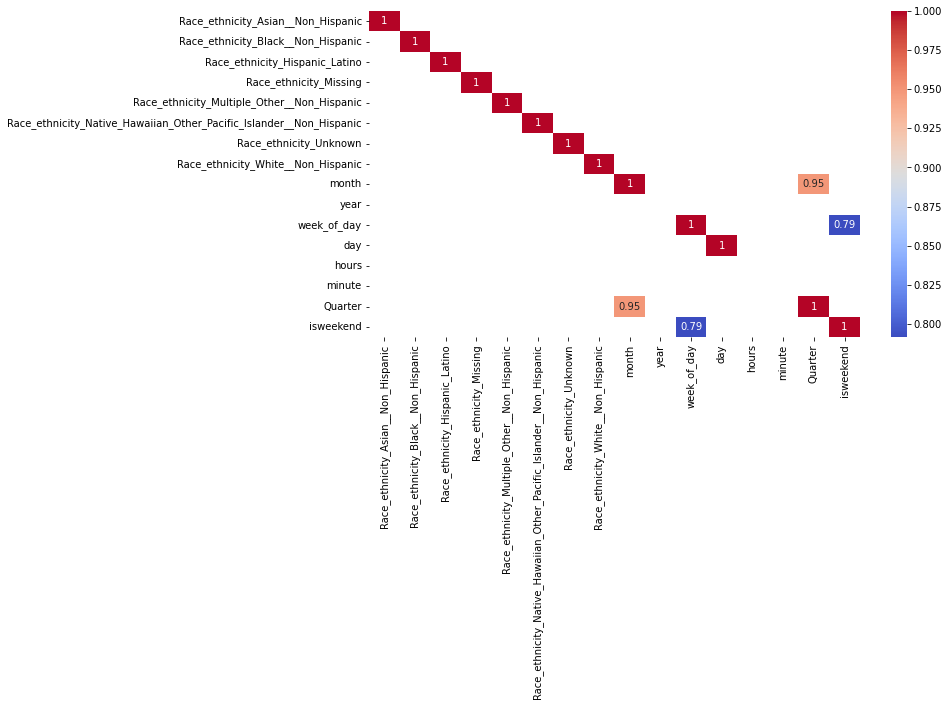

In [79]:
cr = df_final.corr()
cr=cr[abs(cr)>.7]
plt.figure(figsize=(11,6))
sns.heatmap(cr, annot=True, cmap = "coolwarm")

In [80]:
final = pd.get_dummies(data=df_final,drop_first=True)

In [81]:
final

,Race_ethnicity_Asian__Non_Hispanic,Race_ethnicity_Black__Non_Hispanic,Race_ethnicity_Hispanic_Latino,Race_ethnicity_Missing,Race_ethnicity_Multiple_Other__Non_Hispanic,Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic,Race_ethnicity_Unknown,Race_ethnicity_White__Non_Hispanic,month,year,...,age_group_Unknown,hosp_yn_Unknown,hosp_yn_Yes,icu_yn_Unknown,icu_yn_Yes,medcond_yn_Unknown,medcond_yn_Yes,day_cat_mid_of_month,day_cat_starting_of_month,death_1
0,0,0,0,0,0,0,0,1,7,2020,...,0,0,1,1,0,1,0,0,0,1
1,0,0,0,0,0,0,0,1,8,2020,...,0,0,1,1,0,1,0,0,1,1
2,0,0,0,0,0,0,0,1,3,2020,...,0,0,1,0,0,0,1,0,0,1
3,0,1,0,0,0,0,0,0,8,2020,...,0,0,1,1,0,0,1,1,0,1
4,1,0,0,0,0,0,0,0,4,2020,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184150,0,0,0,0,0,0,0,1,9,2020,...,0,0,0,1,0,1,0,0,1,0
184151,0,0,1,0,0,0,0,0,6,2020,...,0,0,0,1,0,1,0,0,0,0
184152,1,0,0,0,0,0,0,0,8,2020,...,0,0,0,1,0,1,0,0,1,0
184153,0,0,0,0,0,0,1,0,5,2020,...,0,1,0,1,0,1,0,0,0,0


### Model Development

In [82]:
y = final["death_1"]
x = final.drop(columns=["death_1"])


In [83]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .3, random_state = 0)

### RANDOM FOREST

In [84]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [85]:
print('Train Accuracy :',rfr.score(x_train,y_train))
print('Test Accuracy :',rfr.score(x_test,y_test))

Train Accuracy : 0.8111729903455984
Test Accuracy : 0.6365442611025088


### LOGISTIC REGRESSION

In [86]:
logR = LogisticRegression(max_iter=1000)

In [87]:
logR.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [88]:
print("Train score : ", logR.score(x_train, y_train))
print("Test score : ", logR.score(x_test, y_test))

Train score :  0.885523008657337
Test score :  0.8867087805672706


In [89]:
pred_train=logR.predict(x_train)
pred_test=logR.predict(x_test)

In [90]:
conf_train=metrics.confusion_matrix(y_train,pred_train)

In [91]:
pd.DataFrame(conf_train, columns=['Pred_0_neg','Pred_1_pos'], index=['Act_0_neg','Act_1_pos'])

,Pred_0_neg,Pred_1_pos
Act_0_neg,69697,7577
Act_1_pos,7180,44454


In [92]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     77274
           1       0.85      0.86      0.86     51634

    accuracy                           0.89    128908
   macro avg       0.88      0.88      0.88    128908
weighted avg       0.89      0.89      0.89    128908



In [93]:
prob_train=pd.DataFrame(logR.predict_proba(x_train),columns=['prob_0','prob_1'])
prob_train

,prob_0,prob_1
0,0.937590,0.062410
1,0.034495,0.965505
2,0.792431,0.207569
3,0.028794,0.971206
4,0.213086,0.786914
...,...,...
128903,0.967742,0.032258
128904,0.590600,0.409400
128905,0.994322,0.005678
128906,0.800756,0.199244


In [94]:
fpr, tpr, thresholds=metrics.roc_curve(y_train,pred_train)
roc_auc=metrics.auc(fpr,tpr)    # AUC : Area under the curve
roc_auc

0.8814453299427798

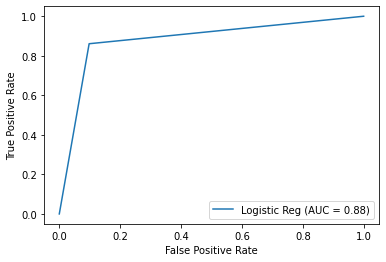

In [95]:
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc, estimator_name='Logistic Reg')
display.plot()
plt.show()

In [114]:
def classification_eva(act,pred,probs):
    ac1=metrics.accuracy_score(act,pred)
    rc1=metrics.recall_score(act,pred)
    pc1=metrics.precision_score(act,pred)
    f1=metrics.f1_score(act,pred)
    auc1=metrics.roc_auc_score(act,pred)
    result={'Accuracy':ac1, 'Recall':rc1, 'Precision': pc1, 'F1 score': f1, 'AUC':auc1}
    
    fpr, tpr, thresholds=metrics.roc_curve(act,probs)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.show()
    return result

In [115]:
pred_train=logR.predict(x_train)
pred_test=logR.predict(x_test)

In [116]:
prob_train_1 = logR.predict_proba(x_train)[:,1]
prob_test_1 = logR.predict_proba(x_test)[:,1]

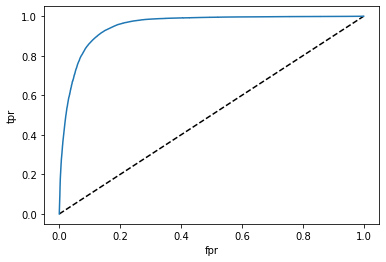

{'Accuracy': 0.885523008657337,
 'Recall': 0.8609443390014332,
 'Precision': 0.8543752762776038,
 'F1 score': 0.8576472290551295,
 'AUC': 0.8814453299427798}

In [117]:
classification_eva(act= y_train,pred=pred_train, probs=prob_train_1)

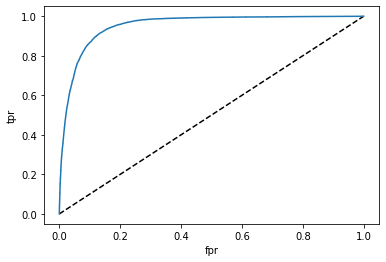

{'Accuracy': 0.8867087805672706,
 'Recall': 0.8607147772629261,
 'Precision': 0.8533933770014556,
 'F1 score': 0.8570384413329983,
 'AUC': 0.8821810059707755}

In [118]:
classification_eva(act= y_test,pred=pred_test, probs=prob_test_1)

### DECISION TREE

In [96]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

print('Train Accuracy :',round(dt.score(x_train,y_train),3))
print('Test Accuracy :',round(dt.score(x_test,y_test),3))

Train Accuracy : 0.937
Test Accuracy : 0.871


In [97]:
dt1=DecisionTreeClassifier(max_depth=6)
dt1.fit(x_train,y_train)

print('Train Accuracy :',round(dt1.score(x_train,y_train),3))
print('Test Accuracy :',round(dt1.score(x_test,y_test),3))

Train Accuracy : 0.89
Test Accuracy : 0.888


In [98]:
dt1=DecisionTreeClassifier(min_samples_split=150)
dt1.fit(x_train,y_train)

print('Train Accuracy : '+str(round(dt1.score(x_train,y_train),3)*100)+str(' %'))
print('Test Accuracy : '+str(round(dt1.score(x_test,y_test),3)*100)+str(' %'))

Train Accuracy : 89.9 %
Test Accuracy : 89.3 %


In [99]:
dt1=DecisionTreeClassifier(min_samples_leaf=50)
dt1.fit(x_train,y_train)

print('Train Accuracy : '+str(round(dt1.score(x_train,y_train),3)*100)+str(' %'))
print('Test Accuracy : '+str(round(dt1.score(x_test,y_test),3)*100)+str(' %'))

Train Accuracy : 89.7 %
Test Accuracy : 89.3 %


In [100]:
dt1=DecisionTreeClassifier(criterion='entropy')
dt1.fit(x_train,y_train)

print('Train Accuracy : '+str(round(dt1.score(x_train,y_train),3)*100)+str(' %'))
print('Test Accuracy : '+str(round(dt1.score(x_test,y_test),3)*100)+str(' %'))

Train Accuracy : 93.7 %
Test Accuracy : 87.2 %


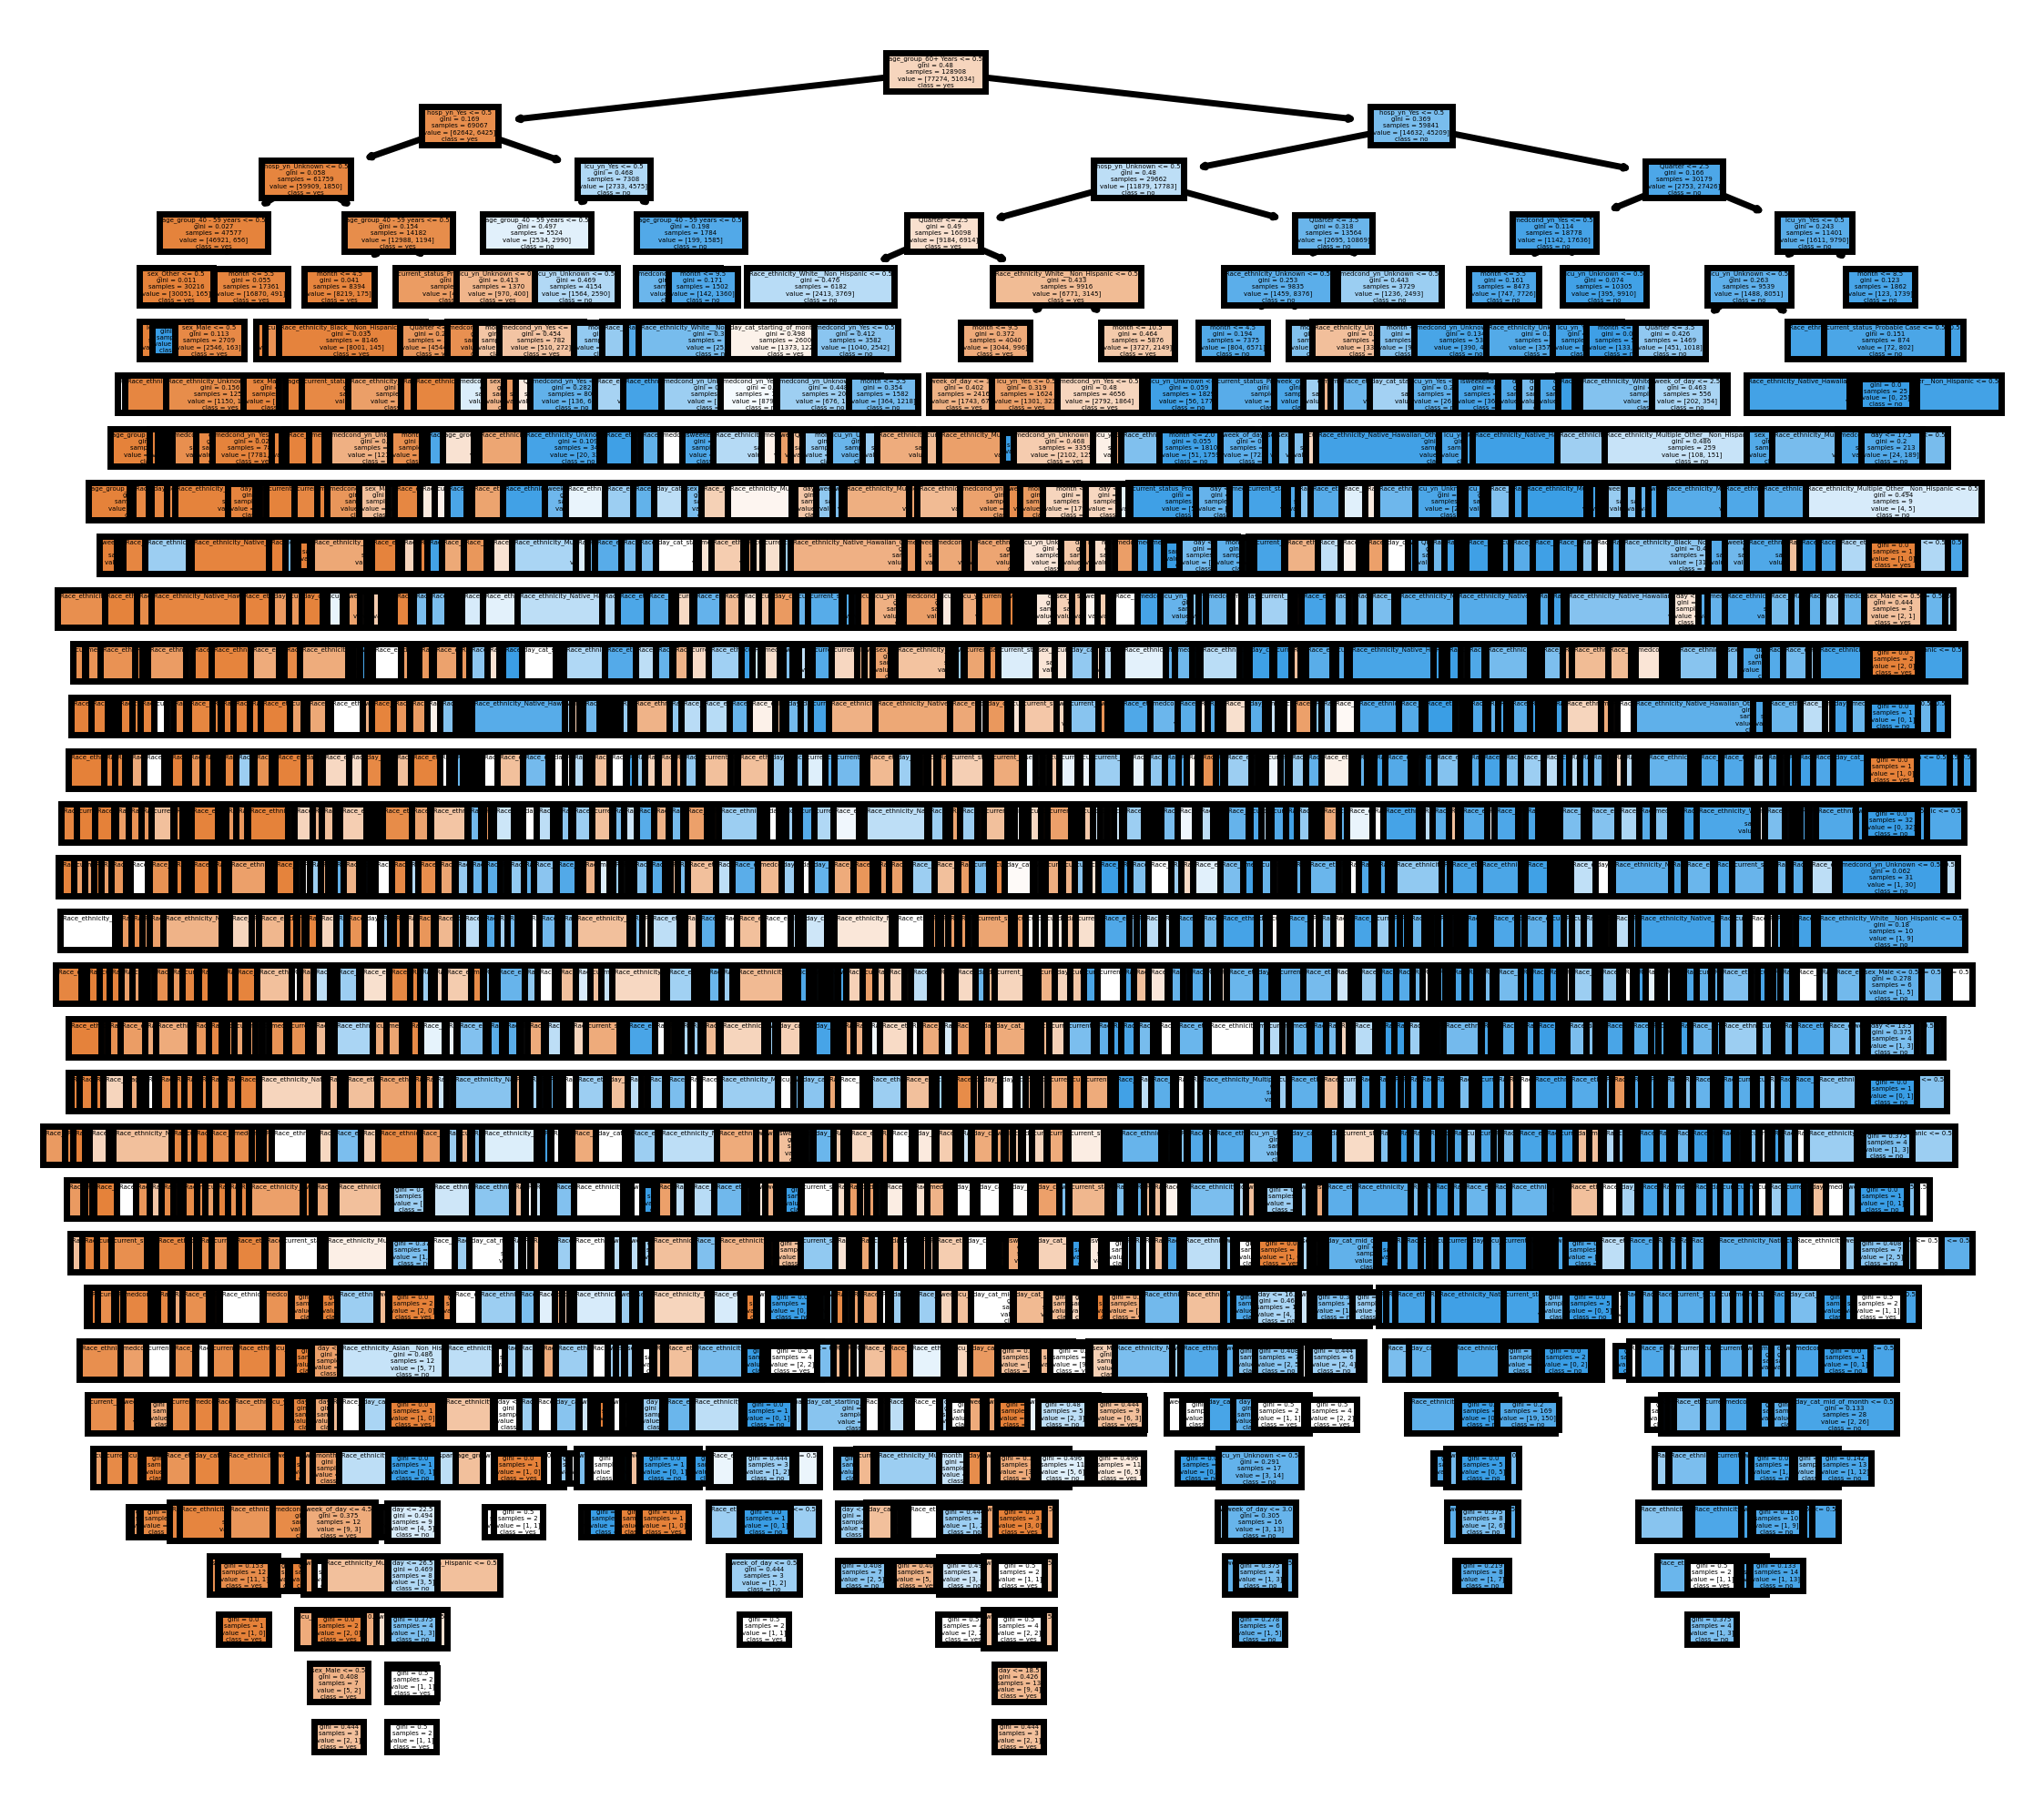

In [101]:
from sklearn.tree import plot_tree
fn=x_train.columns
cn=['yes','no']

# setting dpi = 300 to make image clearer than default 
fig, axes=plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi=500)

dt_plot=plot_tree(dt,
                  feature_names = fn,
                  class_names = cn,
                  filled=True);

In [102]:
from sklearn.model_selection import GridSearchCV

params={
    'criterion': ['gini','entropy'],
    'max_depth': [5,7,9,10,11],
    'min_samples_split': [10,15,20,50,100,200,250],
    'min_samples_leaf': [5,10,15,20,50,80,100]}

dtg=DecisionTreeClassifier()

gd_search=GridSearchCV(estimator=dtg, param_grid=params, cv=10, n_jobs=-1, verbose=2)

gd_search.fit(x_train, y_train)

Fitting 10 folds for each of 490 candidates, totalling 4900 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 10, 11],
                         'min_samples_leaf': [5, 10, 15, 20, 50, 80, 100],
                         'min_samples_split': [10, 15, 20, 50, 100, 200, 250]},
             verbose=2)

In [103]:
gd_search.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 10,
 'min_samples_split': 100}

In [104]:
gd_search.best_score_

0.894126040028047

In [105]:
gd_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=10,
                       min_samples_split=100)

In [106]:
dt1=DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=50,
                       min_samples_split=10)
dt1.fit(x_train,y_train)
print("Train_accuracy",dt1.score(x_train,y_train))
print("Test_accuracy",dt1.score(x_test,y_test))

Train_accuracy 0.8962593477518851
Test_accuracy 0.8920122359585135


In [112]:
pred_train2=dt1.predict(x_train)
pred_test2=dt1.predict(x_test)

In [113]:
prob_train_2 = dt1.predict_proba(x_train)[:,1]
prob_test_2 = dt1.predict_proba(x_test)[:,1]

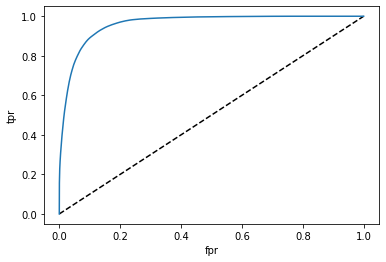

{'Accuracy': 0.8962593477518851,
 'Recall': 0.8837974977727854,
 'Precision': 0.8609051634689758,
 'F1 score': 0.872201144866735,
 'AUC': 0.8941918875876376}

In [119]:
classification_eva(act= y_train,pred=pred_train2, probs=prob_train_2)

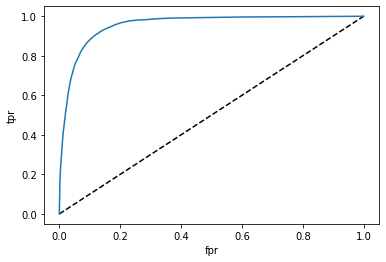

{'Accuracy': 0.8920122359585135,
 'Recall': 0.878423636280222,
 'Precision': 0.8523794684592441,
 'F1 score': 0.865205603253502,
 'AUC': 0.8896453009502755}

In [120]:
classification_eva(act= y_test,pred=pred_test2, probs=prob_test_2)